In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, GRU
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
train=pd.read_csv('sample_data/ETHUSDT_1.1.2018-1.1.2023_1day_modified_1_train.csv')
x_t0 = train['x_train_0'].values
x_t1 = train['x_train_1'].values
x_t2 = train['x_train_2'].values
x_t3 = train['x_train_3'].values
x_train = np.stack((x_t0, x_t1, x_t2, x_t3), axis=1)
y_train = train['y_train'].values
print(x_train)
print(y_train)

[[ 754.99  855.28  934.03  940.  ]
 [ 855.28  934.03  940.    959.3 ]
 [ 934.03  940.    959.3  1004.11]
 ...
 [1216.49 1294.46 1276.41 1295.59]
 [1294.46 1276.41 1295.59 1240.51]
 [1276.41 1295.59 1240.51 1279.41]]
[ 959.3  1004.11 1123.09 ... 1240.51 1279.41 1259.41]


In [ ]:
test=pd.read_csv('sample_data/ETHUSDT_1.1.2018-1.1.2023_1day_modified_1_test.csv')
x_ts0 = test['x_train_0'].values
x_ts1 = test['x_train_1'].values
x_ts2 = test['x_train_2'].values
x_ts3 = test['x_train_3'].values
x_test = np.stack((x_ts0, x_ts1, x_ts2, x_ts3), axis=1)
y_test = test['y_train'].values
print(x_test)
print(y_test)

[[1240.51 1279.41 1259.41 1271.32]
 [1279.41 1259.41 1271.32 1231.18]
 [1259.41 1271.32 1231.18 1280.18]
 [1271.32 1231.18 1280.18 1263.1 ]
 [1231.18 1280.18 1263.1  1266.35]
 [1280.18 1263.1  1266.35 1263.01]
 [1263.1  1266.35 1263.01 1275.4 ]
 [1266.35 1263.01 1275.4  1320.69]
 [1263.01 1275.4  1320.69 1307.44]
 [1275.4  1320.69 1307.44 1266.54]
 [1320.69 1307.44 1266.54 1166.83]
 [1307.44 1266.54 1166.83 1187.16]
 [1266.54 1166.83 1187.16 1183.06]
 [1166.83 1187.16 1183.06 1167.82]
 [1187.16 1183.06 1167.82 1216.94]
 [1183.06 1167.82 1216.94 1213.78]
 [1167.82 1216.94 1213.78 1217.71]
 [1216.94 1213.78 1217.71 1219.99]
 [1213.78 1217.71 1219.99 1220.41]
 [1217.71 1219.99 1220.41 1218.51]
 [1219.99 1220.41 1218.51 1228.11]
 [1220.41 1218.51 1228.11 1211.55]
 [1218.51 1228.11 1211.55 1190.15]
 [1228.11 1211.55 1190.15 1200.49]
 [1211.55 1190.15 1200.49 1199.99]
 [1190.15 1200.49 1199.99 1196.13]
 [1200.49 1199.99 1196.13 1200.34]
 [1199.99 1196.13 1200.34 1214.  ]
 [1196.13 1200.34 12

In [ ]:
model = Sequential()
embedding_vecor_length = 32
model.add(layers.Normalization(input_shape = [4,1], axis = None))
model.add(LSTM(1000))
model.add(Dense(1))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 4, 1)              3         
 tion)                                                           
                                                                 
 lstm_4 (LSTM)               (None, 1000)              4008000   
                                                                 
 dense_4 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4009004 (15.29 MB)
Trainable params: 4009001 (15.29 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________
None


In [ ]:
from pickle import NONE
# Compile and train the learning model
adam = optimizers.Adam(lr=0.0001)

model.compile(adam, loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=None)

Epoch 1/100
57/57 [==============================] - 13s 192ms/step - loss: 2701064.5000 - mean_squared_error: 2701064.5000 - val_loss: 2119769.7500 - val_mean_squared_error: 2119769.7500
Epoch 2/100
57/57 [==============================] - 10s 168ms/step - loss: 2566584.0000 - mean_squared_error: 2566584.0000 - val_loss: 1965309.1250 - val_mean_squared_error: 1965309.1250
Epoch 3/100
57/57 [==============================] - 10s 172ms/step - loss: 2459760.2500 - mean_squared_error: 2459760.2500 - val_loss: 1829809.5000 - val_mean_squared_error: 1829809.5000
Epoch 4/100
57/57 [==============================] - 12s 216ms/step - loss: 2366373.2500 - mean_squared_error: 2366373.2500 - val_loss: 1708548.2500 - val_mean_squared_error: 1708548.2500
Epoch 5/100
57/57 [==============================] - 12s 205ms/step - loss: 2279779.5000 - mean_squared_error: 2279779.5000 - val_loss: 1593535.2500 - val_mean_squared_error: 1593535.2500
Epoch 6/100
57/57 [==============================] - 10s 185

4/4 - 0s - loss: 2256.8772 - mean_squared_error: 2256.8772 - 142ms/epoch - 35ms/step
2256.877197265625


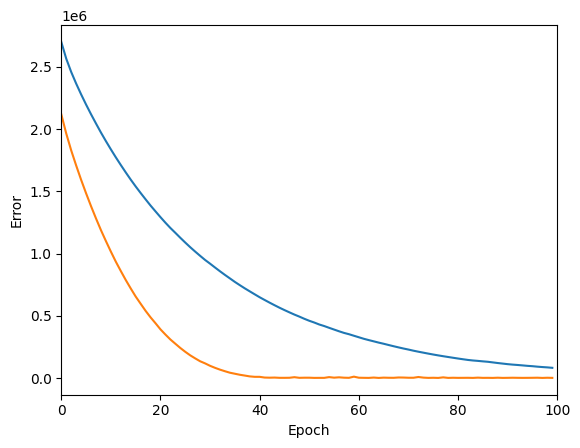

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_loss'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 100])


test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

4/4 [==============================] - 1s 32ms/step


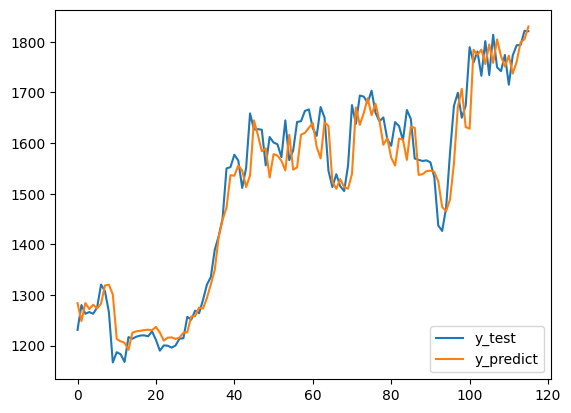

In [ ]:
# Visualize performance evaluation
output = model.predict(x_test)
plt.plot(y_test, label='y_test')
plt.plot(output, label = 'y_predict')
plt.legend(loc='lower right')
plt.show()